<a href="https://colab.research.google.com/github/relfarizi/Portfolio-Saham/blob/master/Portfolio_Saham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [0]:
def convert_to_dollar(saham) :
  usd = 15589
  dollar = []
  for x in saham :
    dollar.append(x/usd)
  return dollar


In [835]:
import pandas as pd
import regex as re
"""
kode_saham = ["AAPL","BA","BATA.JK","BKRKF","CSCO","IBM",
              "TLKMF","AKPI.JK","INTC","MSFT","NVDA",
              "ORCL","PBCRF","PHJMF","PTAIF","SPR"]
"""

#fix 
"""
kode_saham = ["BKRKF",
              "TLKMF",
              "PHJMF"]

"""
# variansi besar
#kode_saham = ["AAPL","BA","BATA.JK","AKPI.JK","INTC","MSFT","NVDA","ORCL","CSCO","IBM","SPR"]

#kode_saham = ["BATA.JK","AKPI.JK"]

kode_saham =["SGRO.JK","TLKM.JK","MYOR.JK","PHJMF"]
#kode_saham =["SGRO.JK","PHJMF"]
kode_tmp = []
sama = False
for i in kode_saham :
  if i in kode_tmp :
    sama =  True
    kodenya = i
    break
  else :
      kode_tmp.append(i)

if sama :
  dataset = []
  print("ada yang sama", kodenya)
else :
  n = len(kode_saham)
  github = "https://raw.githubusercontent.com/relfarizi/Portfolio-Saham/master/Data/"

  df = []
  for i in range(n) :
    datas = pd.read_csv(github+kode_saham[i]+".csv")

    if re.findall(".JK",kode_saham[i]):
      tmp = datas["Close"].tolist()
      data_tmp = convert_to_dollar(tmp)
    else :
      data_tmp =datas["Close"]
    print(data_tmp)
    df.append(pd.DataFrame(data_tmp))
    #print(data_tmp.shape)
  dataset = pd.concat(df, axis=1, sort=False)
  dataset = dataset.dropna()
  dataset.columns = kode_saham
dataset

[0.12188081339405991, 0.12188081339405991, 0.12348450830713965, 0.12765411508114696, 0.12829559304637886, 0.13022002694207455, 0.12957854897684265, 0.13086150490730644, 0.13086150490730644, 0.12765411508114696, 0.1279748540637629, 0.12829559304637886, 0.13086150490730644, 0.13150298287253834, 0.12957854897684265, 0.13086150490730644, 0.13599332862916158, 0.13214446083777023, 0.13150298287253834, 0.12893707101161075, 0.13150298287253834, 0.13086150490730644, 0.12957854897684265, 0.12893707101161075, 0.12893707101161075, 0.12893707101161075, 0.12957854897684265, 0.12829559304637886, 0.12893707101161075, 0.12829559304637886, 0.1279748540637629, 0.1279748540637629, 0.12829559304637886, 0.12957854897684265, 0.1340688947334659, 0.14112515235101675, 0.14176663031624864, 0.14497402014240812, 0.15267175572519084, 0.15267175572519084, 0.15331323369042274, 0.15523766758611843, 0.15908653537750977, 0.16165244723843736, 0.16485983706459684, 0.16614279299506063, 0.16550131502982873, 0.16678427096029

,SGRO.JK,TLKM.JK,MYOR.JK,PHJMF
0,0.121881,0.256591,0.112579,0.31
1,0.121881,0.253384,0.112579,0.31
2,0.123485,0.245686,0.113221,0.31
3,0.127654,0.249535,0.112900,0.29
4,0.128296,0.253384,0.121881,0.29
...,...,...,...,...
99,0.149464,0.236064,0.163577,0.24
100,0.150106,0.235422,0.161011,0.24
101,0.153313,0.239271,0.166784,0.25
102,0.155879,0.241196,0.166784,0.25


In [836]:
rho = dataset.corr().values
dataset.corr()

,SGRO.JK,TLKM.JK,MYOR.JK,PHJMF
SGRO.JK,1.000000,-0.334599,0.489636,0.333151
TLKM.JK,-0.334599,1.000000,-0.727860,0.163095
MYOR.JK,0.489636,-0.727860,1.000000,-0.229313
PHJMF,0.333151,0.163095,-0.229313,1.000000


In [837]:
"""import numpy as np
#print(type(dataset.corr()))
list_corr = []
for x in dataset:
  print(type(dataset.corr()[x]))
  #print(dataset[x].corr())
  #list_corr.append(dataset[x].corr().tolist())
  #print(dataset.corr()[x].tolist())
#rho = np.array(list_corr)
#print(rho)"""

'import numpy as np\n#print(type(dataset.corr()))\nlist_corr = []\nfor x in dataset:\n  print(type(dataset.corr()[x]))\n  #print(dataset[x].corr())\n  #list_corr.append(dataset[x].corr().tolist())\n  #print(dataset.corr()[x].tolist())\n#rho = np.array(list_corr)\n#print(rho)'

In [838]:
import statistics as st
var = []
for x in kode_saham :
  tmp = dataset[x].tolist()
  #print(tmp)
  var.append(st.variance(tmp))
#print(var)
df_var = pd.DataFrame([var])
df_var.columns = kode_saham
df_var

,SGRO.JK,TLKM.JK,MYOR.JK,PHJMF
0,0.000179,0.000603,0.000651,0.001039



# Multi sekuritas


In [839]:
import numpy as np

std_dev = []
for i in var :
  std_dev.append(np.sqrt(i))
n = len(std_dev)

u = np.ones(n)
"""#print(u)
#rho = np.zeros((n,n))
#rho[0][1] = 0.1

#rho[0][2] = 0.2
#rho[0][3] = 0.2
#rho[0][4] = 0.2
#rho[1][2] = 0.2
#rho[1][3] = 0.2
#rho[1][4] = 0.2
#rho[2][3] = 0.2
#rho[2][4] = 0.2
#rho[3][4] = 0.2

for i in range(n) :
  for j in range(n) :
    if j == i :
      rho[i][j] = 1
    elif j < i :
      rho[i][j] = rho[j][i]
print(rho)"""

'#print(u)\n#rho = np.zeros((n,n))\n#rho[0][1] = 0.1\n\n#rho[0][2] = 0.2\n#rho[0][3] = 0.2\n#rho[0][4] = 0.2\n#rho[1][2] = 0.2\n#rho[1][3] = 0.2\n#rho[1][4] = 0.2\n#rho[2][3] = 0.2\n#rho[2][4] = 0.2\n#rho[3][4] = 0.2\n\nfor i in range(n) :\n  for j in range(n) :\n    if j == i :\n      rho[i][j] = 1\n    elif j < i :\n      rho[i][j] = rho[j][i]\nprint(rho)'

In [840]:


def is_short_selling(rho,std_dev):
  n = len(rho)
  print(n)
  check = False
  #rho = rho.sort()
  #std_Dev =std_dev.sort()
  sahamnya = []
  for i in range(n):
    for j in range(n):
      if i < j :
        x = std_dev[i]/std_dev[j]
        #print(rho[i][j])
        if rho[i][j] > x :
          check =True
          sahamnya.append([kode_saham[i],kode_saham[j]])
    
  return [check,sahamnya]

if(is_short_selling(rho,std_dev)[0]) :
  short = {}
  list_short = is_short_selling(rho,std_dev)[1]
  print(list_short)
  for i in list_short :
    x = i[0]
    y = i[1]
    if x not in short.keys():
      short[x] =1
    else :
      short[x] += 1
    
    if y not in short.keys():
      short[y] = 1
    else :
      short[y] += 1
  print(short)
else :
  print("aman")
  print(kode_saham)

4
aman
['SGRO.JK', 'TLKM.JK', 'MYOR.JK', 'PHJMF']


In [841]:
C = (np.zeros((n,n)))

for i in range(n):
  for j in range(n) :
    C[i][j] = std_dev[i]*rho[i][j]*std_dev[j]
print(C)

[[ 0.00017878 -0.00010986  0.00016706  0.00014357]
 [-0.00010986  0.00060295 -0.00045606  0.00012908]
 [ 0.00016706 -0.00045606  0.00065112 -0.0001886 ]
 [ 0.00014357  0.00012908 -0.0001886   0.00103883]]


In [842]:
from numpy.linalg import inv
from numpy.linalg import det
u = np.ones(n)
uT = np.transpose(u)

CInv = inv(C)

w = np.dot(u,CInv)/(u.dot(CInv).dot(uT))
print(w)

[0.29257272 0.38010811 0.298626   0.02869317]


In [816]:
#w = np.array([0.3,0.4])
wT = np.transpose(w)
x = np.dot(u,wT)
print("jumlah w = ",x)

jumlah w =  1.0


In [817]:
risk = w.dot(C).dot(wT)
print(round(risk,4))

0.0002


Expected return saham


In [0]:
import math
def find_ud(saham) :
  K = []
  
  
  for i in range(len(saham)-1) :
    x = (saham[i+1]-saham[i])/saham[i]
    K.append(x)
  up = []
  down = []

  for i in K :
    if i > 0 :
      x = 1
      y = 0
    else :
      x = 0
      y = 1
    up.append(x)
    down.append(y)
  
  x_up = 1
  x_down = 1

  sum_u = 0
  sum_d = 0

  for i in range(len(K)) :
    x_up += K[i]*up[i]
    sum_u += up[i]
    x_down += K[i]*down[i]
    sum_d += down[i]
  
  u = x_up/sum_u
  d = x_up/sum_d

  p = sum_u/(sum_u+sum_d)
  q = 1-p

  result = {"u" : u, "d" : d,"p":p,"q":q}
  
  return result

In [0]:
def return_saham(df_saham) :
  result = {}
  for saham in df_saham :
    x = find_ud(df_saham[saham])
    exp = (x["u"]*x["p"])+(x["d"]*x["q"])
    result[saham] = exp
  return result

In [0]:
return_ = return_saham(dataset)
m = []
for saham in return_ :
  m.append(return_[saham])

In [805]:

import pandas as pd

m = np.array(m)
print(m)
EK = m.dot(wT)
print("ekspektasi return = ", EK)
risk = w.dot(C).dot(wT)
print("risk = ",risk)

portfolio=[round(x,4) for x in w]
portfolio.append(EK)
portfolio.append(risk)
print(portfolio)

df_port = pd.DataFrame([portfolio])
column = kode_saham
print(kode_saham)
column.append("Expected Return")
column.append("Risiko")
df_port.columns = column
df_port

[0.0321097  0.03328877]
ekspektasi return =  0.0321543168663123
risk =  0.0001774499825507187
[0.9622, 0.0378, 0.0321543168663123, 0.0001774499825507187]
['PHJMF', 'SGRO.JK']


,PHJMF,SGRO.JK,Expected Return,Risiko
0,0.9622,0.0378,0.032154,0.000177


In [806]:
mT = np.transpose(m)
e_r = EK
w_new = []
list_EK = []
for i in range(4) :
  e_r *= 1.02
  list_EK.append(e_r)
  
  matA = np.dot(u,(CInv))
  matB = np.dot(m,(CInv))
  mat1 = u.dot(CInv).dot(mT)
  mat2 = m.dot(CInv).dot(mT)
  mat3 = u.dot(CInv).dot(uT)
  mat4 = m.dot(CInv).dot(uT)

  A1 = np.array([[1,mat1],[e_r,mat2]]) 
  A2 = np.array([[mat3,1],[mat4,e_r]])
  A3 = np.array([[mat3,mat1],[mat4,mat2]])

  det1 = det([[1,mat1],[e_r,mat2]])
  det2 = det([[mat3,1],[mat4,e_r]])
  det3 = det([[mat3,mat1],[mat4,mat2]])
  w = ((det1*matA)+(det2*matB))/det3
  w_new.append(w)
print(w_new)
print(list_EK)

[array([0.41673928, 0.58326072]), array([-0.13959004,  1.13959004]), array([-0.70704594,  1.70704594]), array([-1.28585096,  2.28585096])]
[0.032797403203638546, 0.03345335126771132, 0.034122418293065546, 0.034804866658926854]


In [807]:
list_bobot = []
i = 0
for bobot in w_new :
  tmp = []
  wT = np.transpose(bobot)
  risk = bobot.dot(C).dot(wT)
  for x in bobot :
    tmp.append(x)
  tmp.append(list_EK[i])
  tmp.append(risk)
  list_bobot.append(tmp)
  i+=1
print(list_bobot)

df = pd.DataFrame(list_bobot)
df.columns = column
df_tmp =df_port
new_df = df_tmp.append(df,ignore_index=True)
new_df

[[0.41673927741725064, 0.5832607225828373, 0.032797403203638546, 0.00045424698088082616], [-0.13959003847697488, 1.1395900384767532, 0.03345335126771132, 0.001306892454536699], [-0.7070459406882814, 1.7070459406885805, 0.034122418293065546, 0.002769943999453812], [-1.2858509609447204, 2.2858509609446043, 0.034804866658926854, 0.004879581204792964]]


,PHJMF,SGRO.JK,Expected Return,Risiko
0,0.962200,0.037800,0.032154,0.000177
1,0.416739,0.583261,0.032797,0.000454
2,-0.139590,1.139590,0.033453,0.001307
3,-0.707046,1.707046,0.034122,0.002770
4,-1.285851,2.285851,0.034805,0.004880


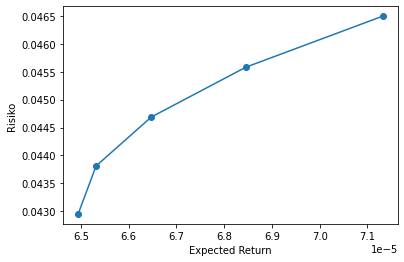

In [708]:
import matplotlib.pyplot as plt

y = new_df["Expected Return"]
x = new_df["Risiko"]

plt.plot(x,y)
plt.scatter(x,y)
plt.xlabel("Expected Return")
plt.ylabel("Risiko")
plt.show()